In [3]:
import pandas as pd     
import numpy as np
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()




Saving Batsman_Data.csv to Batsman_Data.csv


Saving Bowler_data.csv to Bowler_data.csv


Saving Ground_Averages.csv to Ground_Averages.csv


Saving ODI_Match_Results.csv to ODI_Match_Results.csv


Saving ODI_Match_Totals.csv to ODI_Match_Totals.csv


Saving WC_players.csv to WC_players.csv


In [5]:
batsman_data = pd.read_csv("Batsman_Data.csv")
bowler_data = pd.read_csv("Bowler_data.csv")
ground_data = pd.read_csv("Ground_Averages.csv")
result_data = pd.read_csv("ODI_Match_Results.csv")
total_data = pd.read_csv("ODI_Match_Totals.csv")
player_data = pd.read_csv("WC_players.csv")

In [6]:
print(ground_data.shape)
print(result_data.shape)
print(total_data.shape)
print(bowler_data.shape)
print(batsman_data.shape)
print(player_data.shape)

(106, 11)
(1322, 12)
(1296, 13)
(11118, 14)
(11149, 13)
(152, 3)


In [9]:
batsman_data.head(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [10]:
bowler_data.head(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [11]:
player_data.head(5)

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


In [12]:
result_data.head(5)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [13]:
total_data.head(5)

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [14]:
ground_data.head(5)

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


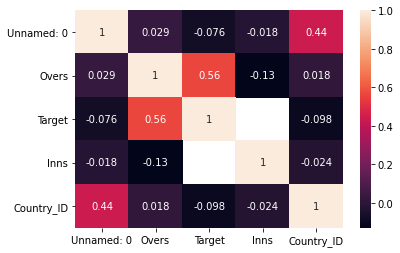

In [49]:
import seaborn as sns
sns.heatmap(total_data.corr(),annot=True)

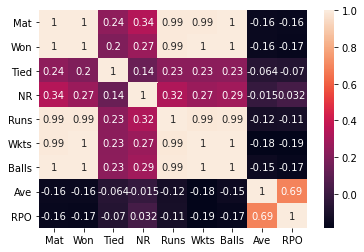

In [51]:
sns.heatmap(ground_data.corr(),annot=True)

In [25]:
# Create a list of venues
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff",
"County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton",
"Old Trafford, Manchester","Edgbaston, Birmingham"
,"Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]

#Total Grounds
WC_Ground_Stats = []
ODI_Grounds = total_data.Ground
for i in ODI_Grounds:
    for j in WC_venue_pitches:
        if i in j:
            WC_Ground_Stats.append((i,j))

# we have a different format for specific grounds,a function which will be a mapping of those values
Ground_names = dict(set(WC_Ground_Stats))
def Full_Ground_names(value):
    return Ground_names[value]


# Replace ground name with full ground names in odi_match_totals dataframe
Grounds_History = total_data[total_data.Ground.isin([Ground[0] for Ground in WC_Ground_Stats])]
Grounds_History["Ground"] = Grounds_History.Ground.apply(Full_Ground_names)
Grounds_History.reset_index()

# Find matches won on WC venues based on country value provided
def findMatchesWon(country):
    country_played = Grounds_History['Country'] == country
    won = Grounds_History['Result']=='won'
    country_stats = Grounds_History[country_played & won].groupby('Ground')['Ground'].count()
    return country_stats
# Find matches played WC venues based on country value provided
def findMatchesPlayed(country):
    return Grounds_History[Grounds_History['Country'] == country].groupby('Ground')['Ground'].count()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
#Matches won by India
won_india=findMatchesWon('India')
won_india

Ground
Edgbaston, Birmingham       5
Sophia Gardens, Cardiff     3
The Oval, London            2
Trent Bridge, Nottingham    2
Name: Ground, dtype: int64

In [29]:
#Matches played by India
played_india=findMatchesPlayed('India')
played_india

Ground
Edgbaston, Birmingham       5
Headingley, Leeds           2
Lord's, London              1
Sophia Gardens, Cardiff     3
The Oval, London            4
Trent Bridge, Nottingham    2
Name: Ground, dtype: int64

In [30]:
#Overall % of the matches won by India
win_per_india=(won_india.values.sum()/played_india.values.sum())*100
win_per_india

70.58823529411765

In [35]:
#Matches won  when teams chose to bat first!
bat_first_wins = Grounds_History[(Grounds_History['Inns']==1) 
& (Grounds_History['Result']=='won')].groupby('Ground')['Ground'].count()
bat_first_wins

Ground
County Ground, Bristol                 1
Edgbaston, Birmingham                  5
Headingley, Leeds                      2
Lord's, London                         4
Old Trafford, Manchester               2
Riverside Ground, Chester-le-Street    1
Rose Bowl, Southampton                 5
Sophia Gardens, Cardiff                6
The Oval, London                       5
Trent Bridge, Nottingham               3
Name: Ground, dtype: int64

In [37]:
#Matches won when teams chose to bat second!
bat_second_wins = Grounds_History[(Grounds_History['Inns']==2) 
& (Grounds_History['Result']=='won')].groupby('Ground')['Ground'].count()
bat_second_wins

Ground
County Ground, Bristol                  2
Edgbaston, Birmingham                   7
Headingley, Leeds                       3
Lord's, London                          3
Old Trafford, Manchester                4
Riverside Ground, Chester-le-Street     2
Rose Bowl, Southampton                  3
Sophia Gardens, Cardiff                 7
The Oval, London                       10
Trent Bridge, Nottingham                4
Name: Ground, dtype: int64

In [53]:
# Average scores to win pitch-wise while setting target and chasing
first_bat_win_scores = {}
updated_win_scores_first_bat = {}
avg_win_score_first_bat_pitch = {}
chase_win_scores = {}
updated_win_scores_chase = {}
avg_win_score_chase_pitch = {}
for pitch in WC_venue_pitches:
    first_bat_win_scores[pitch] = Grounds_History[(Grounds_History['Result']=='won') & (Grounds_History['Inns']==1) & (Grounds_History['Ground']==pitch)] ['Score']
    updated_win_scores_first_bat[pitch] = [int(x.split('/', 1)[0]) for x in first_bat_win_scores[pitch]]
    if (len(updated_win_scores_first_bat[pitch]) != 0):
        avg_win_score_first_bat_pitch[pitch] = sum(updated_win_scores_first_bat[pitch])/len(updated_win_scores_first_bat[pitch])
    else:
        avg_win_score_first_bat_pitch[pitch] = 0
    
    chase_win_scores[pitch] = Grounds_History[(Grounds_History['Result']=='won') & (Grounds_History['Inns']==2) & (Grounds_History['Ground']==pitch)] ['Score']
    updated_win_scores_chase[pitch] = [int(x.split('/', 1)[0]) for x in chase_win_scores[pitch]]
    if (len(updated_win_scores_chase[pitch]) != 0):
        avg_win_score_chase_pitch[pitch] = sum(updated_win_scores_chase[pitch])/len(updated_win_scores_chase[pitch])
    else:
        avg_win_score_chase_pitch[pitch] = 0

In [54]:
avg_win_score_first_bat_pitch

{'County Ground, Bristol': 369.0,
 'County Ground, Taunton': 0,
 'Edgbaston, Birmingham': 271.8,
 'Headingley, Leeds': 316.5,
 "Lord's, London": 314.75,
 'Old Trafford, Manchester': 307.5,
 'Riverside Ground, Chester-le-Street': 256.0,
 'Rose Bowl, Southampton': 333.0,
 'Sophia Gardens, Cardiff': 296.6666666666667,
 'The Oval, London': 307.0,
 'Trent Bridge, Nottingham': 404.0}

In [55]:
avg_win_score_chase_pitch

{'County Ground, Bristol': 243.0,
 'County Ground, Taunton': 0,
 'Edgbaston, Birmingham': 202.28571428571428,
 'Headingley, Leeds': 272.0,
 "Lord's, London": 214.0,
 'Old Trafford, Manchester': 157.75,
 'Riverside Ground, Chester-le-Street': 253.0,
 'Rose Bowl, Southampton': 264.6666666666667,
 'Sophia Gardens, Cardiff': 225.14285714285714,
 'The Oval, London': 249.2,
 'Trent Bridge, Nottingham': 297.0}

**Conclusion**

It's clear that by batting second,more matches are won.
